## Table of Content

1. **[Import Libraries](#lib)**

2. **[Introduction](#intro)**

3. **[Data Description](#datadesc)**

4. **[Data Visualisation](#vis)**

5. **[CLT Implementation](#clt)**

6. **[Data Fitting and Correlation](#datafit)**

7. **[Log Transformation](#logtransform)**

8. **[ANOVA](#anova)**

9. **[Chi Square Test of Independence](#chisquare)**

10. **[Regression Modelling](#regression)**



## Importing Libraries<a id="lib"></a>

In [25]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

<a id="intro"></a>
## Introduction 

This project utilizes a variety of statistical methodologies to analyze a dataset that details power consumption across three zones in Tetouan City, along with environmental variables such as temperature, humidity, wind speed, and diffuse flows. Using descriptive statistics, we clarify the central tendencies and variability in urban electricity usage and environmental conditions. Visual analysis techniques, including time-series graphs, histograms, and Q-Q plots, are employed to evaluate distribution patterns and the normality of the data. Additionally, scatter plots and polynomial regression models are used to investigate potential relationships.

The objective of this project is to analyze power consumption patterns and environmental variables in Tetouan City, Morocco, utilizing statistical methodologies. Specifically, the project aims to:

1.	Conduct descriptive statistical analyses to understand the variability in power consumption across the three zones of Tetouan City.
2.	Examine the relationship between power consumption and environmental variables such as temperature, humidity, wind speed, and solar flows.
3.	Employ time-series graphs, histograms, Q-Q plots, scatter plots, and polynomial regression models to visualize and analyze the distribution patterns of the data.
4.	Investigate factors that potentially influence power consumption in Tetouan City, considering its geographic location, population dynamics, and climatic conditions.


<a id='datadesc'> </a>
## Data Description

The provided dataset encapsulates a range of environmental features, meticulously recorded, to explore their influence on electricity usage across distinct urban zones. Central to this exploration are key environmental variables:

●	Temperature: A pivotal factor, it is known to have a direct correlation with the energy expended for heating and cooling, thereby influencing consumption patterns significantly.

●	Humidity: This variable affects the comfort level indoors, leading to adjustments in heating or cooling that directly impact power usage.

●	Wind Speed: Wind conditions can alter the need for climate control within buildings and also act as a predictor of changing weather patterns, influencing electricity usage in various ways.

●	General Diffuse Flows and Diffuse Flows: These metrics, often reflective of solar radiation levels, can play a role in passive solar heating of structures and the requirement for lighting, thereby affecting power demand.

Target Variables – Zone-Specific Power Consumption:

Our analysis targets the quantification of power consumption within three distinct zones of Tetuan City:

●	Zone 1 Power Consumption: This metric represents the electricity demand within a densely populated or commercially active area, serving as a primary indicator of energy requirements.

●	Zone 2 Power Consumption: Capturing the consumption in a second, possibly differing area, it provides insight into the variance of energy needs and usage behaviors across the city.

●	Zone 3 Power Consumption: Consistently lower in demand, this area's consumption patterns might reveal efficiencies or urban planning strategies that could be leveraged elsewhere for energy conservation.

This analysis will employ descriptive statistics to provide foundational insights into the distribution and variability of urban power usage.

The table presents a descriptive statistical summary of the Tetuan City power consumption dataset. It encapsulates key metrics — temperature, humidity, wind speed, general diffuse flows, diffuse flows, and power consumption for Zones 1, 2, and 3. Each feature is characterized by its count, mean, median, mode, minimum, and maximum values, along with the standard deviation, providing an initial overview of the data's distribution and central tendencies without delving into deeper analytical interpretations.


In [42]:
df = pd.read_csv("Tetuan City power consumption.csv")
print(df.shape)
df.head()


(52416, 9)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [43]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


<a id ='vis'> </a>
## Data Visualization

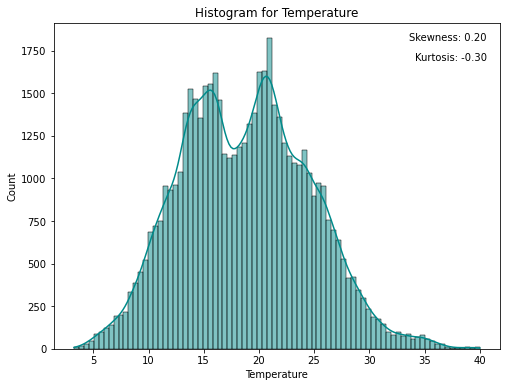

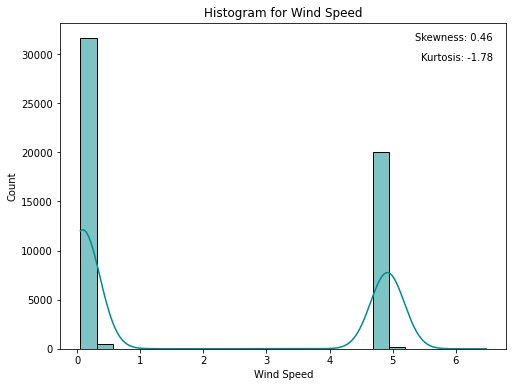

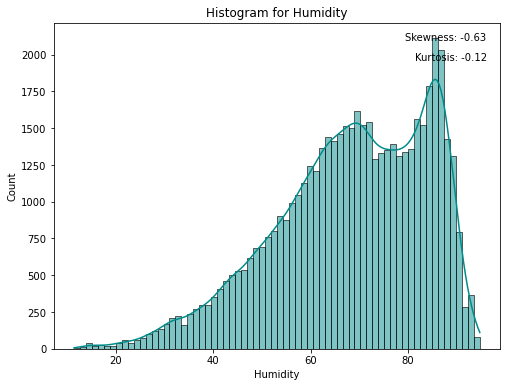

In [44]:
columns = ['Temperature', 'Wind Speed', 'Humidity']
# Loop through each column in the dataset
for column in columns:
    # Extract data for the current column
    column_data = df[column]
    
    # Create a figure and axes for the plot
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with KDE
    sns.histplot(column_data, kde=True, color='darkcyan')
    
    # Calculate skewness and kurtosis
    skewness = st.skew(column_data)
    kurtosis = st.kurtosis(column_data)
    
    # Add skewness and kurtosis values as text on the plot
    plt.text(x=0.97, y=0.97, transform=plt.gca().transAxes, s=f"Skewness: {skewness:.2f}", \
             fontsize=10, verticalalignment='top', horizontalalignment='right')
    plt.text(x=0.97, y=0.91, transform=plt.gca().transAxes, s=f"Kurtosis: {kurtosis:.2f}", \
             fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    # Set plot title
    plt.title(f"Histogram for {column}")
    
    # Show plot
    plt.show()


The histograms for temperature and humidity from the Tetuan City dataset provide insights into the distribution of these environmental variables.

Humidity Histogram: The distribution of humidity levels displays a left-skewed (negative skewness) pattern, where most of the data are concentrated on the higher end of the humidity range. This suggests that there are more instances of high humidity than low within the dataset. The skewness value of -0.63 indicates a moderate skew to the left. The kurtosis value of -0.12 suggests that the distribution is relatively flat compared to a normal distribution, with fewer outliers than expected in a normally distributed set.

While wind speed is an important environmental factor, the specific characteristics of its distribution in this dataset—with a significant skew towards lower values—makes it less suitable for inclusion in the primary analysis to understand power consumption patterns in Tetouan City. Instead, focusing on other variables that exhibit more variability and a stronger potential relationship with power consumption may yield more actionable insights.

In [45]:
data=df.drop(labels='DateTime',axis=1)

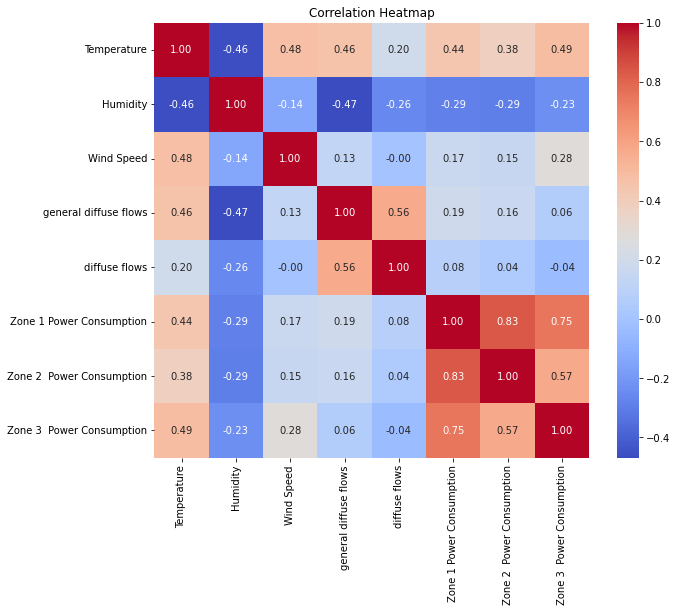

In [46]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


The heatmap provided illustrates the correlation coefficients between different variables in the dataset, with colors ranging from orange (indicating a negative correlation) to blue (indicating a positive correlation).

Temperature has a moderate positive correlation with Zone 1, 2, and 3 Power Consumption, indicating that as the temperature rises, the power consumption in all zones also tends to increase. This relationship is quite intuitive as higher temperatures could lead to increased use of cooling systems.

Wind Speed appears to have a very weak correlation with power consumption across all zones, suggesting it might not be a significant predictor for power usage in this context.

Humidity shows a moderate negative correlation with power consumption across the zones, indicating that as humidity increases, power consumption tends to decrease. This might be due to less need for humidification or dehumidification systems during high humidity periods.

The correlations between Diffuse Flows/General Diffuse Flows and power consumption are relatively weak, suggesting they have a minimal linear relationship with the power consumption variables.

It's noteworthy that the power consumption variables (Zone 1, 2, and 3 Power Consumption) are strongly positively correlated with each other. This suggests that there are common factors affecting power usage across these zones.


Variables with stronger correlations (closer to -1 or 1) could be considered more important when building predictive models or when trying to understand the factors influencing power consumption. In contrast, variables with correlations close to 0, like Wind Speed, may be less important in such models, although they should not be disregarded without further analysis, as they might have nonlinear relationships or interactions with other variables that are not captured by a correlation coefficient.

In [56]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


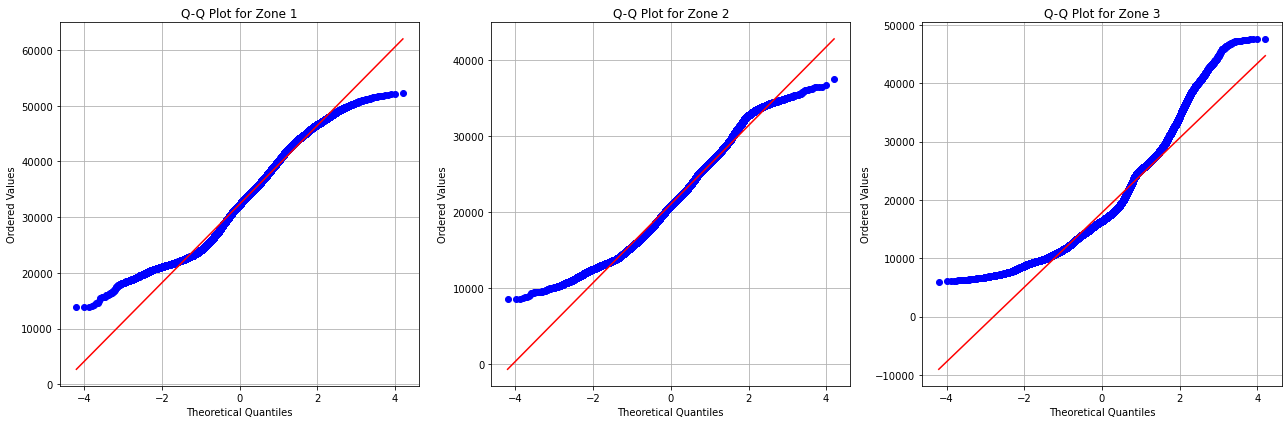

In [57]:
# Extract the data for each zone
zone1_data = data['Zone 1 Power Consumption']
zone2_data = data['Zone 2  Power Consumption']
zone3_data = data['Zone 3  Power Consumption']

# Create subplots for Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create Q-Q plot for zone1
stats.probplot(zone1_data, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot for Zone 1')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Ordered Values')
axes[0].grid(True)

# Create Q-Q plot for zone2
stats.probplot(zone2_data, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Zone 2')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].grid(True)

# Create Q-Q plot for zone3
stats.probplot(zone3_data, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot for Zone 3')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Ordered Values')
axes[2].grid(True)

plt.tight_layout()
plt.show()


The Q-Q plots for power consumption in Tetuan City's Zones 1, 2, and 3 reveal a mostly symmetrical distribution around the mean, with data points adhering closely to the theoretical line of normality in the central quantiles. This indicates that for a significant portion of the data, the consumption patterns can be approximated by a normal distribution, reflecting a degree of regularity and predictability in everyday usage.

While the plots exhibit some skewness and heavy-tailed behavior indicating outliers, these are relatively contained, suggesting that extreme values are not the norm but rather occasional deviations. Such outliers could stem from unique events or peak usage times, offering valuable perspectives for understanding the full spectrum of power consumption behavior.

In summary, the power consumption data for all zones shows a good approximation to normality in the central range, with deviations that are insightful rather than disruptive. This balance of expected behavior with identifiable anomalies provides a solid foundation for statistical modeling and energy usage forecasting, allowing for both stability in predictions and allowances for occasional peaks in demand.

The Q-Q plot for Zone 3 presents an interesting case. While the data points in the middle quantiles largely conform to the expected theoretical distribution, suggesting normal behavior, there's a noticeable departure in the tails. Particularly, the upper tail reveals a greater prevalence of outliers compared to Zones 1 and 2. This indicates that Zone 3 experiences more frequent and extreme deviations in power consumption from what a normal distribution would predict.


<a id='clt'></a>
## CLT Implementation

The Central Limit Theorem (CLT) is a fundamental statistical concept that describes the characteristics of the sampling distribution of sample means. It states that, given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, these sample means will be distributed approximately normally (the bell-shaped curve), regardless of the shape of the population distribution.

In simpler terms, the CLT tells us that for a large number of samples, the distribution of the sample means will tend toward a normal distribution, even if the original data is not normally distributed. This property holds as the sample size becomes larger, typically considered to be over 30 samples according to a common rule of thumb.

Here’s how the CLT works in practice:

Sample Collection: Collect multiple random samples of the same size from a population.
Mean Calculation: Calculate the mean (average) of each sample.
Distribution Analysis: Plot the distribution of these means. As the number of samples increases, this distribution of sample means will become increasingly normal.

The histograms for the power consumption of Zones 1, 2, and 3 reveal distinct distribution characteristics:

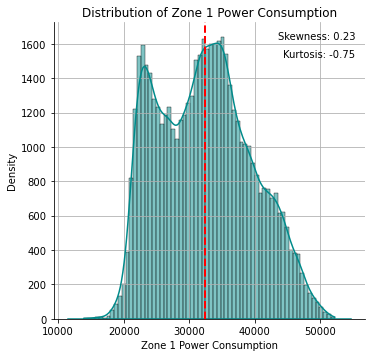

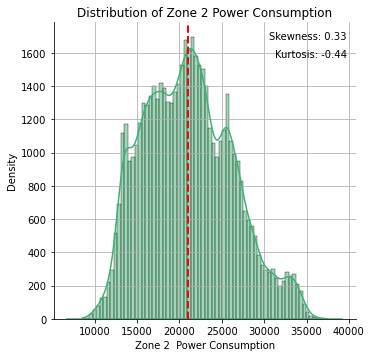

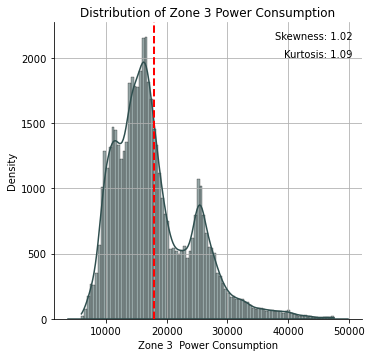

In [59]:
import seaborn as sns
import scipy.stats as st

def plot_kde_and_histogram(data, color):
    # Plot KDE
    g = sns.displot(data=data, kind='kde', color=color)
    for ax in g.axes.ravel():
        ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=f"Skewness: {st.skew(data):.2f}", \
                fontsize=10, verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.97, y=0.91, transform=ax.transAxes, s=f"Kurtosis: {st.kurtosis(data):.2f}", \
                fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    # Plot histogram
    sns.histplot(data=data, kde=True, color=color)
    # plt.title(f"Histogram with KDE")

# Extracting data for each variable
zone1_power = data.iloc[:, 5]
zone2_power = data.iloc[:, 6]
zone3_power = data.iloc[:, 7]

# Plotting KDE and histograms for each variable
plot_kde_and_histogram(zone1_power, 'darkcyan')
plt.axvline(zone1_power.mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
mean_value = zone1_power.mean()
# plt.axvline(zone1_power.median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Distribution of Zone 1 Power Consumption')
plt.grid(True)  # Add grid
plt.show()

plot_kde_and_histogram(zone2_power, 'mediumseagreen')
plt.axvline(zone2_power.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Zone 2 Power Consumption')
plt.grid(True)  # Add grid
plt.show()

plot_kde_and_histogram(zone3_power, 'darkslategrey')
plt.axvline(zone3_power.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Zone 3 Power Consumption')
plt.grid(True)  # Add grid
plt.show()


**Zone 1 Power Consumption:**

The histogram shows a near-symmetrical distribution around the central peak, indicated by a skewness close to zero.

The distribution is slightly platykurtic, with a kurtosis value less than zero, suggesting fewer outliers and less extreme values than a normal distribution.

**Zone 2 Power Consumption:**

This distribution displays a mild positive skew, as reflected by a skewness value greater than zero, suggesting a tail with higher values.

With a slight negative kurtosis, the distribution is again platykurtic, implying that it is relatively flat with tails lighter than those of a normal distribution.

**Zone 3 Power Consumption:**

The distribution here is significantly positively skewed, with skewness over 1, showing a pronounced tail towards the higher end of power consumption.
The kurtosis greater than 1 indicates a leptokurtic distribution, revealing the presence of more outliers and a higher propensity for extreme values.





<a id='datafit'></a>
## Data Fitting and Correlation

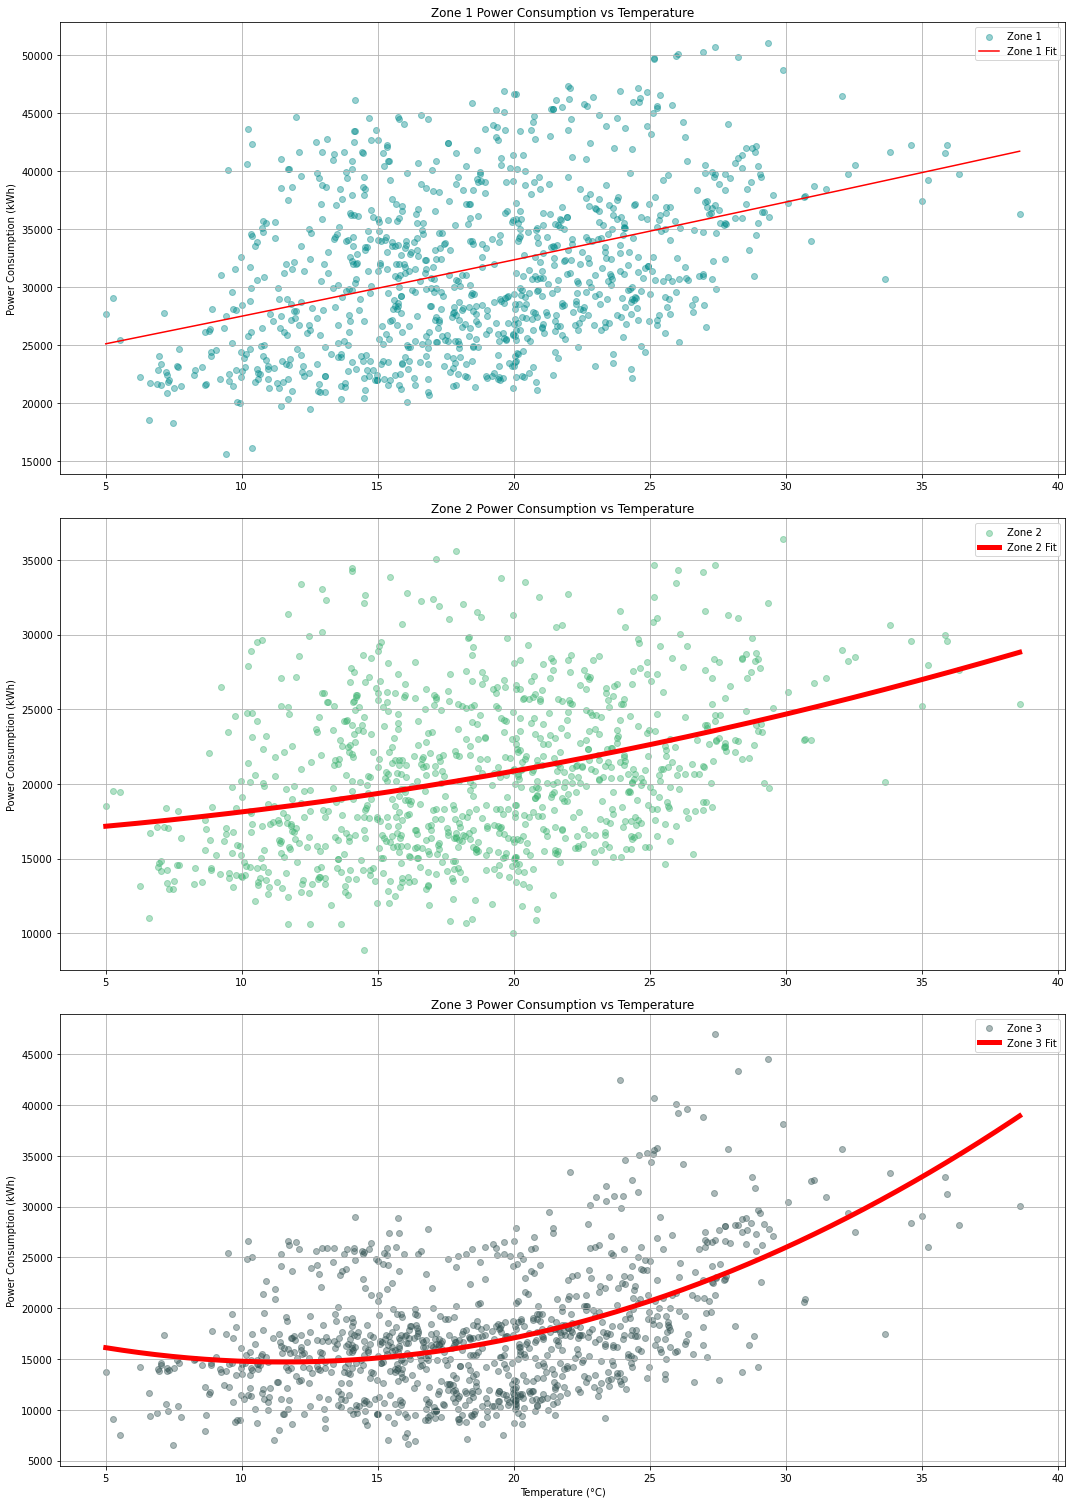

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and contains 'Temperature' column
# and 'zone1_power', 'zone2_power', 'zone3_power' have been defined as suggested

# Taking a random sample of 1000 data points to avoid overplotting
sample_indices = data.sample(n=1000, random_state=1).index
sample_temperature = data['Temperature'].loc[sample_indices]
sample_zone1_power = zone1_power.loc[sample_indices]
sample_zone2_power = zone2_power.loc[sample_indices]
sample_zone3_power = zone3_power.loc[sample_indices]

# Fit a polynomial curve of degree 2 (quadratic) to the data
z1_fit = np.polyfit(sample_temperature, sample_zone1_power, 2)
z1_p = np.poly1d(z1_fit)

z2_fit = np.polyfit(sample_temperature, sample_zone2_power, 2)
z2_p = np.poly1d(z2_fit)

z3_fit = np.polyfit(sample_temperature, sample_zone3_power, 2)
z3_p = np.poly1d(z3_fit)

# Generate a sequence of temperatures for plotting the fit
temp_fit = np.linspace(sample_temperature.min(), sample_temperature.max(), 500)

# Setting up the plot with three subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 21))

# Scatter plot for Zone 1
axes[0].scatter(sample_temperature, sample_zone1_power, color ='darkcyan', alpha=0.4, label='Zone 1')
axes[0].plot(temp_fit, z1_p(temp_fit), color='red', label='Zone 1 Fit')
axes[0].set_title('Zone 1 Power Consumption vs Temperature')
axes[0].set_ylabel('Power Consumption (kWh)')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for Zone 2
axes[1].scatter(sample_temperature, sample_zone2_power, color = 'mediumseagreen', alpha=0.4, label='Zone 2')
axes[1].plot(temp_fit, z2_p(temp_fit), color='red', label='Zone 2 Fit',linewidth=5)
axes[1].set_title('Zone 2 Power Consumption vs Temperature')
axes[1].set_ylabel('Power Consumption (kWh)')
axes[1].legend()
axes[1].grid(True)

# Scatter plot for Zone 3
axes[2].scatter(sample_temperature, sample_zone3_power, color = 'darkslategrey', alpha=0.4, label='Zone 3')
axes[2].plot(temp_fit, z3_p(temp_fit), color='red', label='Zone 3 Fit',linewidth=5)
axes[2].set_title('Zone 3 Power Consumption vs Temperature')
axes[2].set_xlabel('Temperature (°C)')  # Only label x-axis on the last plot
axes[2].set_ylabel('Power Consumption (kWh)')
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



The scatter plots for Zones 1, 2, and 3 indicate a positive correlation between temperature and power consumption, with the fitted trend lines sloping upward as temperature increases. This relationship suggests that warmer conditions tend to coincide with higher electricity use. 

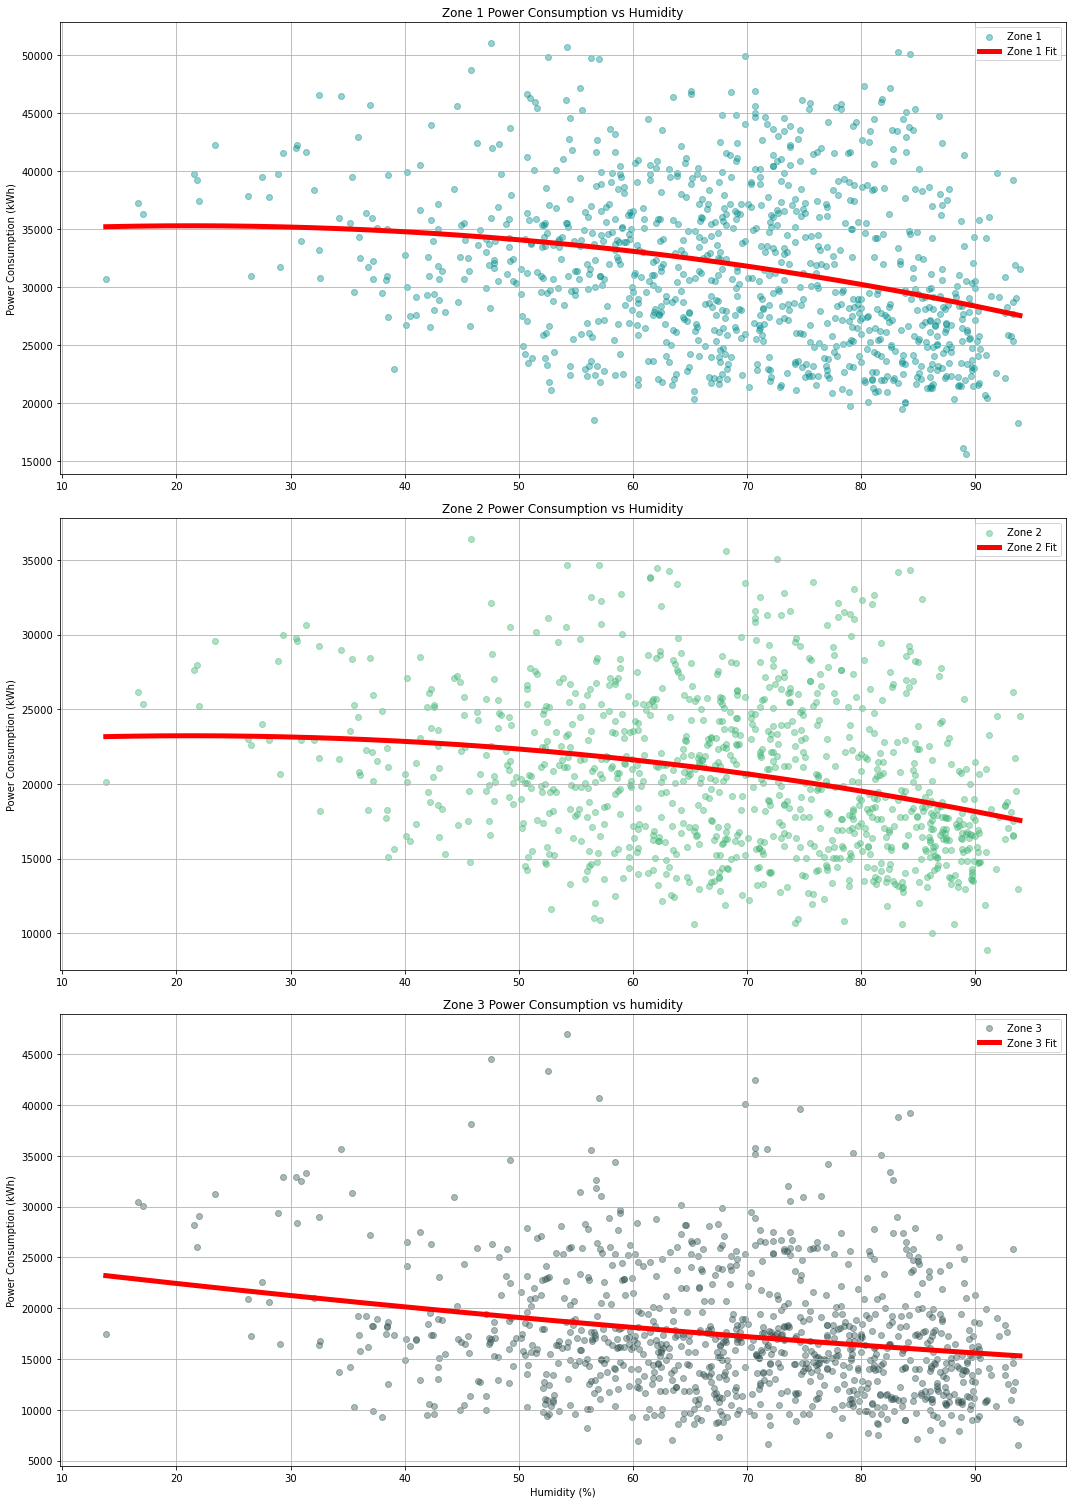

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and contains 'Temperature' column
# and 'zone1_power', 'zone2_power', 'zone3_power' have been defined as suggested

# Taking a random sample of 1000 data points to avoid overplotting
sample_indices = data.sample(n=1000, random_state=1).index
sample_humidity = data['Humidity'].loc[sample_indices]
sample_zone1_power = zone1_power.loc[sample_indices]
sample_zone2_power = zone2_power.loc[sample_indices]
sample_zone3_power = zone3_power.loc[sample_indices]

# Fit a polynomial curve of degree 2 (quadratic) to the data
z1_fit = np.polyfit(sample_humidity, sample_zone1_power, 2)
z1_p = np.poly1d(z1_fit)

z2_fit = np.polyfit(sample_humidity, sample_zone2_power, 2)
z2_p = np.poly1d(z2_fit)

z3_fit = np.polyfit(sample_humidity, sample_zone3_power, 2)
z3_p = np.poly1d(z3_fit)

# Generate a sequence of humidity for plotting the fit
temp_fit = np.linspace(sample_humidity.min(), sample_humidity.max(), 500)

# Setting up the plot with three subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 21))

# Scatter plot for Zone 1
axes[0].scatter(sample_humidity, sample_zone1_power, color ='darkcyan', alpha=0.4, label='Zone 1')
axes[0].plot(temp_fit, z1_p(temp_fit), color='red', label='Zone 1 Fit',linewidth=5)
axes[0].set_title('Zone 1 Power Consumption vs Humidity')
axes[0].set_ylabel('Power Consumption (kWh)')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for Zone 2
axes[1].scatter(sample_humidity, sample_zone2_power, color = 'mediumseagreen', alpha=0.4, label='Zone 2')
axes[1].plot(temp_fit, z2_p(temp_fit), color='red', label='Zone 2 Fit',linewidth=5)
axes[1].set_title('Zone 2 Power Consumption vs Humidity')
axes[1].set_ylabel('Power Consumption (kWh)')
axes[1].legend()
axes[1].grid(True)

# Scatter plot for Zone 3
axes[2].scatter(sample_humidity, sample_zone3_power, color = 'darkslategrey', alpha=0.4, label='Zone 3')
axes[2].plot(temp_fit, z3_p(temp_fit), color='red', label='Zone 3 Fit',linewidth=5)
axes[2].set_title('Zone 3 Power Consumption vs humidity')
axes[2].set_xlabel('Humidity (%)')  # Only label x-axis on the last plot
axes[2].set_ylabel('Power Consumption (kWh)')
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


The relationship between humidity and power consumption is negatively correlated, as illustrated by the downward trend lines; this suggests that higher humidity levels may be associated with lower power usage across the zones. These correlations highlight the varying impacts of temperature and humidity on energy consumption behaviors in urban environments.

<a id='logtransform'></a>
## Log Transformation 

ANOVA (Analysis of Variance) is a powerful statistical method used to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups. However, one of the key assumptions of ANOVA is that the data should be approximately normally distributed within each group or category being compared. Additionally, ANOVA assumes that the variances across groups are equal (homogeneity of variances) and that the observations are independent.

Applying a log transformation can make the underlying assumptions of ANOVA more tenable. By transforming skewed data into a more normal form, we ensure that the analyses we conduct are more robust and the conclusions drawn are more reliable. Log transformation reduces the effect of outliers by compressing the scale and bringing large values closer to the group, which diminishes their influence on the overall statistical analysis.


C:\Users\hp\AppData\Local\Temp\ipykernel_5244\2674478532.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


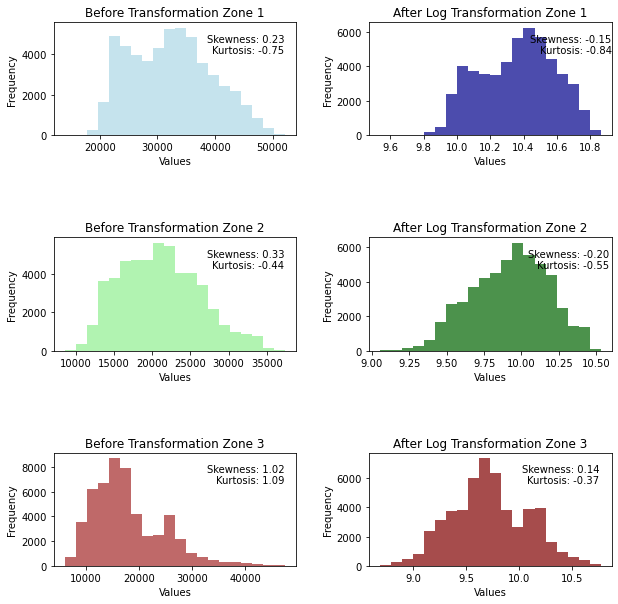

In [104]:
from scipy.stats import skew, kurtosis
# Apply log transformation to the data
log_data1 = np.log(data['Zone 1 Power Consumption'])
log_data2 = np.log(data['Zone 2  Power Consumption'])
log_data3 = np.log(data['Zone 3  Power Consumption'])
zone1_data=data['Zone 1 Power Consumption']
zone2_data=data['Zone 2  Power Consumption']
zone3_data=data['Zone 3  Power Consumption']

fig, axes = plt.subplots(3, 2, figsize=(10, 10),gridspec_kw={'hspace': 0.9, 'wspace': 0.3})

# Create histograms for each zone
axes[0, 0].hist(zone1_data, bins=20, color='lightblue', alpha=0.7)
axes[0, 0].set_title('Before Transformation Zone 1')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
skewness = skew(zone1_data)
kurt = kurtosis(zone1_data)
axes[0, 0].text(0.95, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[0, 0].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

axes[1, 0].hist(zone2_data, bins=20, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Before Transformation Zone 2')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
skewness = skew(zone2_data)
kurt = kurtosis(zone2_data)
axes[1, 0].text(0.95, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[1, 0].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

axes[2, 0].hist(zone3_data, bins=20, color='brown', alpha=0.7)
axes[2, 0].set_title('Before Transformation Zone 3')
axes[2, 0].set_xlabel('Values')
axes[2, 0].set_ylabel('Frequency')
skewness = skew(zone3_data)
kurt = kurtosis(zone3_data)
axes[2, 0].text(0.95, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[2, 0].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

axes[0, 1].hist(log_data1, bins=20, color='darkblue', alpha=0.7)
axes[0, 1].set_title('After Log Transformation Zone 1')
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
skewness = skew(log_data1)
kurt = kurtosis(log_data1)
axes[0, 1].text(1.0, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[0, 1].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

axes[1, 1].hist(log_data2, bins=20, color='darkgreen', alpha=0.7)
axes[1, 1].set_title('After Log Transformation Zone 2')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
skewness = skew(log_data2)
kurt = kurtosis(log_data2)
axes[1, 1].text(0.99, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[1,1].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

axes[2, 1].hist(log_data3, bins=20, color='maroon', alpha=0.7)
axes[2, 1].set_title('After Log Transformation Zone 3')
axes[2, 1].set_xlabel('Values')
axes[2, 1].set_ylabel('Frequency')
skewness = skew(log_data3)
kurt = kurtosis(log_data3)
axes[2, 1].text(0.95, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=axes[2, 1].transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.show()


The log transformations make the distributions more symmetric and less skewed, particularly visible in Zone 1 and Zone 2 power consumption data. 

●	Log Zone 1 Power Consumption:
   - Skewness: -0.15 (close to zero, less skewed)
   - Kurtosis: -0.84 (platykurtic; fewer outliers, broader peak)

●	Log Zone 2 Power Consumption:
   - Skewness: -0.20 (close to zero, less skewed)
   - Kurtosis: -0.55 (platykurtic; fewer outliers, broader peak)

●	Log Zone 3 Power Consumption:
   - Skewness: 0.14 (close to zero, slightly skewed to the right)
   - Kurtosis: -0.37 (platykurtic; fewer outliers, broader peak)

Comparing these with the original distributions:

●	Original Zone 1 Power Consumption:
  - Skewness: 0.23 (moderate right skewness)
  - Kurtosis: -0.75 (platykurtic)

●	Original Zone 2 Power Consumption:
  - Skewness: 0.33 (moderate right skewness)
  - Kurtosis: -0.44 (platykurtic)

●	Original Zone 3 Power Consumption:
  - Skewness: 1.02 (significant right skewness)
  - Kurtosis: 1.09 (leptokurtic; heavy tails, sharper peak)

The log-transformed data shows a noticeable improvement towards normality, especially with the reduction in skewness across all zones, although Zone 3 still shows some irregularities which might need further transformation or a different normalization technique if the log transformation isn't sufficient for your analytical needs.

Overall, the log transformation has been effective in reducing the effects of skewness and stabilizing variance across the datasets.


<a id='anova'></a>
## ANOVA 

In the context of our data which compares power consumption across three different zones, the hypotheses for the ANOVA test are formulated as follows:

Null Hypothesis (H0): The mean power consumption is the same across all three zones. This implies that any observed differences in average power consumption between zones are due to random variation within samples.

Alternative Hypothesis (H1): At least one zone's mean power consumption differs from the others. This implies that there is a statistically significant difference in power consumption between at least one pair of zones.


In [105]:
from scipy.stats import f_oneway
zone1_data=data['Zone 1 Power Consumption']
zone2_data=data['Zone 2  Power Consumption']
zone3_data=data['Zone 3  Power Consumption']
f_oneway(zone1_data, zone2_data, zone3_data)

F_onewayResult(statistic=75028.9996201205, pvalue=0.0)

●	F-value: 75028.99962 is extraordinarily high, indicating the variances between the group means are significantly different.

●	P-value: A p-value of 0 in statistical testing indicates that the observed data are highly unlikely under the null hypothesis. This suggests strong evidence against the null hypothesis.

Given the high F-value and a p-value of approximately 0, we reject the null hypothesis. This suggests that there is a statistically significant difference in power consumption among at least one of the zones compared to the others. The data supports the alternative hypothesis that not all zones have the same mean power consumption, indicating the need for possibly different management strategies or operational adjustments for each zone to optimize power usage.

<a id='chisquare'></a>
## Chi-Square Test of Independence

Chi-square tests are used mainly for categorical data to test relationships between variables. Given that our dataset primarily contains continuous data (such as temperature, humidity, wind speed, and power consumption), a chi-square test might not be directly applicable to these continuous variables. For this, we convert our continuous variables into categorical data based on logical thresholds. The following tests have been done after categorizing our continuous data as Low (below 33%), Medium (33% to 66%), and High (above 66%).

Null Hypothesis (H0): Temperature and humidity categories are independent of each other.

Alternative Hypothesis (H1): Temperature and humidity categories are not independent.



In [9]:
import pandas as pd
from scipy.stats import chi2_contingency
from tabulate import tabulate

temp_percentiles = data['Temperature'].quantile([0.33, 0.66])
humidity_percentiles = data['Humidity'].quantile([0.33, 0.66])

data['Temp Category'] = pd.cut(data['Temperature'],
                               bins=[-float('inf'), temp_percentiles[0.33], temp_percentiles[0.66], float('inf')],
                               labels=['Low', 'Medium', 'High'])

data['Humidity Category'] = pd.cut(data['Humidity'],
                                   bins=[-float('inf'), humidity_percentiles[0.33], humidity_percentiles[0.66], float('inf')],
                                   labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['Temp Category'], data['Humidity Category'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Prepare the results in a DataFrame for better display
results = pd.DataFrame({
    "Chi-square Statistic": [chi2_stat],
    "Degrees of Freedom": [dof],
    "P-value": [p_value]
})

# Print the contingency table and the test results in a beautiful format
print("Contingency Table:")
print(tabulate(contingency_table, headers='keys', tablefmt='psql'))

print("\nChi-square Test Results:")
print(tabulate(results, headers='keys', tablefmt='psql', showindex=False))


Contingency Table:
+-----------------+-------+----------+--------+
| Temp Category   |   Low |   Medium |   High |
|-----------------+-------+----------+--------|
| Low             |  3352 |     6132 |   7847 |
| Medium          |  4462 |     6225 |   6581 |
| High            |  9488 |     5041 |   3288 |
+-----------------+-------+----------+--------+

Chi-square Test Results:
+------------------------+----------------------+-----------+
|   Chi-square Statistic |   Degrees of Freedom |   P-value |
|------------------------+----------------------+-----------|
|                5669.78 |                    4 |         0 |
+------------------------+----------------------+-----------+


The Chi-square statistic is substantially high, and the p-value is effectively zero. This provides strong statistical evidence against the null hypothesis.
Given the p-value is much less than the common threshold of 0.05, we reject the null hypothesis, concluding that there is a statistically significant association between temperature and humidity categories in the Tetuan City dataset. The relationship indicates that changes in one of these variables are likely associated with changes in the other.


<br>
Null Hypothesis (H0): Temperature and wind speed categories are independent of each other.

Alternative Hypothesis (H1): Temperature and wind speed categories are not independent.


In [10]:
# Categorize temperature based on percentiles
temp_percentiles = data['Temperature'].quantile([0.33, 0.66])
data['Temp Category'] = pd.cut(data['Temperature'],
                               bins=[-float('inf'), temp_percentiles[0.33], temp_percentiles[0.66], float('inf')],
                               labels=['Low', 'Medium', 'High'])

# Categorize wind speed based on percentiles
wind_speed_percentiles = data['Wind Speed'].quantile([0.33, 0.66])
data['Wind Speed Category'] = pd.cut(data['Wind Speed'],
                                     bins=[-float('inf'), wind_speed_percentiles[0.33], wind_speed_percentiles[0.66], float('inf')],
                                     labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['Temp Category'], data['Wind Speed Category'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Prepare the results in a DataFrame for better display
results = pd.DataFrame({
    "Chi-square Statistic": [chi2_stat],
    "Degrees of Freedom": [dof],
    "P-value": [p_value]
})

# Print the contingency table and the test results in a beautiful format
print("Contingency Table:")
print(tabulate(contingency_table, headers='keys', tablefmt='psql'))

print("\nChi-square Test Results:")
print(tabulate(results, headers='keys', tablefmt='psql', showindex=False))


Contingency Table:
+-----------------+-------+----------+--------+
| Temp Category   |   Low |   Medium |   High |
|-----------------+-------+----------+--------|
| Low             |  7334 |     7419 |   2578 |
| Medium          |  7919 |     4158 |   5191 |
| High            |  3159 |     4707 |   9951 |
+-----------------+-------+----------+--------+

Chi-square Test Results:
+------------------------+----------------------+-----------+
|   Chi-square Statistic |   Degrees of Freedom |   P-value |
|------------------------+----------------------+-----------|
|                7990.88 |                    4 |         0 |
+------------------------+----------------------+-----------+


Given the statistical evidence (p-value close to 0 and a high chi-square statistic), we can conclude that there is a significant association between temperature and wind speed categories in this dataset. The patterns observed in the contingency table suggest that higher temperatures are likely associated with higher wind speeds. This provides strong statistical evidence against the null hypothesis.

<br>
Null Hypothesis (H0): Humidity and wind speed categories are independent of each other.

Alternative Hypothesis (H1): Humidity and wind speed categories are not independent.

In [11]:


# Categorize humidity based on percentiles
humidity_percentiles = data['Humidity'].quantile([0.33, 0.66])
data['Humidity Category'] = pd.cut(data['Humidity'],
                                   bins=[-float('inf'), humidity_percentiles[0.33], humidity_percentiles[0.66], float('inf')],
                                   labels=['Low', 'Medium', 'High'])

# Categorize wind speed based on percentiles
wind_speed_percentiles = data['Wind Speed'].quantile([0.33, 0.66])
data['Wind Speed Category'] = pd.cut(data['Wind Speed'],
                                     bins=[-float('inf'), wind_speed_percentiles[0.33], wind_speed_percentiles[0.66], float('inf')],
                                     labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['Humidity Category'], data['Wind Speed Category'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Prepare the results in a DataFrame for better display
results = pd.DataFrame({
    "Chi-square Statistic": [chi2_stat],
    "Degrees of Freedom": [dof],
    "P-value": [p_value]
})

# Print the contingency table and the test results in a beautiful format
print("Contingency Table:")
print(tabulate(contingency_table, headers='keys', tablefmt='psql'))

print("\nChi-square Test Results:")
print(tabulate(results, headers='keys', tablefmt='psql', showindex=False))


Contingency Table:
+---------------------+-------+----------+--------+
| Humidity Category   |   Low |   Medium |   High |
|---------------------+-------+----------+--------|
| Low                 |  4102 |     6954 |   6246 |
| Medium              |  6710 |     5096 |   5592 |
| High                |  7600 |     4234 |   5882 |
+---------------------+-------+----------+--------+

Chi-square Test Results:
+------------------------+----------------------+-----------+
|   Chi-square Statistic |   Degrees of Freedom |   P-value |
|------------------------+----------------------+-----------|
|                1822.98 |                    4 |         0 |
+------------------------+----------------------+-----------+


Given the p-value is much less than the common threshold of 0.05, we reject the null hypothesis, concluding that there is a statistically significant association between humidity and wind speed categories in the dataset. The nature of this association, as indicated by the contingency table, seems to show that lower wind speeds tend to occur more frequently with higher humidity levels. Hence we reject our null hypothesis.

<a id='regression'></a>
## Regression Modelling

In [6]:
import statsmodels.api as sm

# Select columns for features and target variable
X =  data[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']] # Features
y = data['Zone 1 Power Consumption'] # Target variable

# Add constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.207
Method:                       Least Squares   F-statistic:                     2741.
Date:                      Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                              13:37:35   Log-Likelihood:            -5.3333e+05
No. Observations:                     52416   AIC:                         1.067e+06
Df Residuals:                         52410   BIC:                         1.067e+06
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

**Regression Statistics:**

●	R Square: 0.207268134 - Adjusts the R-squared value for the number of predictors in the model, showing that after accounting for the number of variables, about 20.7% of the variance is explained.

●	Standard Error: 6349.034222 - This is the average distance that the observed values fall from the regression line. Essentially, it's a measure of the typical error or the accuracy of the predictions.

●	Observations: 52416 - The number of data points used in the regression.


**ANOVA (Analysis of Variance):**

●	F-Statistic: 2741 with a Significance F of 0 - This tests whether at least one predictor variable has a non-zero coefficient. A significant F-statistic (p-value ≈ 0) indicates that the model is statistically significant.

**Coefficients Analysis**

**Intercept:** 

●	Coefficient: 26750.45117 - This is the expected mean value of Zone 1 power consumption when all predictors are held at zero.

**Temperature**

●	Coefficient: 534.8066978 - Indicates that for each unit increase in temperature, Zone 1 power consumption increases by approximately 534.81 units, holding all other variables constant.

●	t-Stat: 83.33145322 - A high t-statistic and a p-value of 0 show that temperature is a highly significant predictor of power consumption.

●	95% Confidence Interval: [522.280431, 547.4409646] - We are 95% confident that the true coefficient of temperature lies within this interval, indicating a strong and positive effect of temperature on power consumption.

**Humidity:**

●	Coefficient: -56.51007158 - For each unit increase in humidity, Zone 1 power consumption decreases by about 56.51 units.

●	t-Stat: -26.52488735 - Indicates a highly significant negative relationship between humidity and power consumption.

●	95% Confidence Interval: [-60.68578255, -52.33436062] - This interval does not include zero, reinforcing the significance of humidity's impact.

**Wind Speed:**

●	Coefficient: -148.7016417 - suggests that an increase in wind speed leads to a decrease in power consumption by about 148.70 units.

●	t-Stat: -10.95079392 - Signifying a strong negative influence of wind speed on power consumption.

●	95% Confidence Interval: [-175.3167524, -122.0865309] - Confidence in the negative effect of wind speed is high as the interval is entirely below zero.

**General Diffuse Flows:**

●	Coefficient: -1.701964754 - A slight decrease in power consumption with an increase in general diffuse flows.

●	t-Stat: -11.62768399 - Statistically significant negative relationship.

●	95% Confidence Interval: [-1.988854789, -1.415074742] - Consistent negative impact as the interval is fully negative.

**Diffuse Flows:**

●	Coefficient: -0.087306939 - A minor decrease in power consumption with an increase in diffuse flows, although the impact is smaller.

●	t-Stat: -0.320907392 - Not statistically significant (p-value: 0.748281852).

●	95% Confidence Interval: [-0.620552392, 0.445938515] - This interval includes zero, indicating uncertainty about the effect of diffuse flows on power consumption.

The regression analysis reveals significant influences of temperature, humidity, wind speed, and general diffuse flows on Zone 1 power consumption, with temperature showing the strongest positive impact and humidity and wind speed showing significant negative impacts. The model explains a significant portion of the variability in power consumption, though not all, suggesting other factors might also be important. The non-significant result for diffuse flows indicates that it may not be a reliable predictor of power consumption in this model.


In [8]:
# Select columns for features and target variable
X =  data[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']] # Features
y = data['Zone 2  Power Consumption'] # Target variable

# Add constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Zone 2  Power Consumption   R-squared:                       0.171
Model:                                   OLS   Adj. R-squared:                  0.171
Method:                        Least Squares   F-statistic:                     2158.
Date:                       Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                               13:38:38   Log-Likelihood:            -5.1798e+05
No. Observations:                      52416   AIC:                         1.036e+06
Df Residuals:                          52410   BIC:                         1.036e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

**Regression Statistics:**

●	R-Squared: 0.170718889 - About 17.1% of the variance in the dependent variable is explained by the model. This suggests that while there is some relationship, many other factors likely affect power consumption that aren't included in this model.

●	Standard Error: 4736.934254 - This represents the average distance that the observed values fall from the regression line, indicating the typical prediction error.

●	Observations: 52416 - The number of data points used in the regression is substantial, supporting the robustness of the statistical conclusions.



**ANOVA (Analysis of Variance):**

F-Statistic: 2158. with a Significance F of 0 - Indicates the overall significance of the regression model. A significant F-statistic (near zero p-value) confirms that at least some of the predictor variables reliably predict the dependent variable.


**Coefficients Analysis**

**Intercept:**

●	Coefficient: 19539.72326 - This is the expected mean value of power consumption when all predictors are zero.


**Temperature:**

●	Coefficient: 319.250321 - Suggests each unit increase in temperature is associated with an increase of approximately 319.25 units in power consumption.

●	t-Stat: 66.66684805 - A high t-statistic and a p-value of 0 indicate that temperature is a statistically significant predictor of power consumption.

●	95% Confidence Interval: [309.8643428, 328.6362992] - Provides strong confidence in the precise positive impact of temperature on power consumption.

**Humidity:**

●	Coefficient: -58.51267583 - Each unit increase in humidity is associated with a decrease of about 58.51 in power consumption.

●	t-Stat: -36.81187889 - Indicates a statistically significant negative relationship between humidity and power consumption.

●	95% Confidence Interval: [-61.62812105, -55.39723061] - Strongly significant and specifically quantifies the negative effect of humidity.

**Wind Speed:**

●	Coefficient: -86.47953528 - An increase in wind speed leads to a significant decrease in power consumption by approximately 86.48 units.

●	t-Stat: -8.535982212 - Statistically significant negative influence.

●	95% Confidence Interval: [-106.3367333, -66.62233727] - Confirms the substantial negative impact of wind speed on power consumption.



**General Diffuse Flows:**

●	Coefficient: -1.296960338 - A small but significant decrease in power consumption is associated with an increase in general diffuse flows.

●	t-Stat: -11.62627316 - Significantly negative relationship.

●	95% Confidence Interval: [-1.483705369, -1.055615306] - Clearly defines the negative effect, though the magnitude is small.

**Diffuse Flows:**

●	Coefficient: -1.242006017 - A small decrease in power consumption for each unit increase in diffuse flows.

●	t-Stat: -7.016369309 - Indicates a significant negative impact.

●	95% Confidence Interval: [-1.822048316, -0.1026352919] - Supports the significant but small negative impact.


The regression analysis shows significant effects of all included predictors on Zone 2 power consumption, with temperature showing the strongest positive effect, while humidity and wind speed exhibit significant negative effects. The general and diffuse flows also negatively impact power consumption but to a lesser extent. The R-squared value, while not very high, does confirm that these variables collectively explain a portion of the variance in power consumption. More variables or perhaps different models might be necessary to capture more of the variability in the power consumption data.


In [9]:
# Select columns for features and target variable
X =  data[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']] # Features
y = data['Zone 3  Power Consumption'] # Target variable

# Add constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Zone 3  Power Consumption   R-squared:                       0.281
Model:                                   OLS   Adj. R-squared:                  0.281
Method:                        Least Squares   F-statistic:                     4105.
Date:                       Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                               13:40:24   Log-Likelihood:            -5.2688e+05
No. Observations:                      52416   AIC:                         1.054e+06
Df Residuals:                          52410   BIC:                         1.054e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

**Regression Statistics:**

●	Multiple R: 0.530506338 - Indicates a moderate correlation between the observed and predicted values of the dependent variable; about 53.1% of the variance in power consumption is explained by the linear relationship with the independent variables.

●	R-Squared: 0.281436975 - This value suggests that approximately 28.14% of the variance in the dependent variable is explained by the model. This is higher than previous models, indicating a better fit.

●	Adjusted R Square: 0.281386423 - This adjustment, very close to the R-squared, indicates the model efficiently accounts for the number of predictors.

●	Standard Error: 5613.751088 - This is the average distance that the observed values fall from the regression line, suggesting the typical prediction error.

●	Observations: 52416 - A substantial number of data points used in the regression supports robustness in the statistical conclusions.

**ANOVA (Analysis of Variance):**

F-Statistic: 4105. with a Significance F of 0 - Demonstrates the overall significance of the regression model. A significant F-statistic confirms that at least some of the predictor variables reliably predict the dependent variable.

**Coefficients Analysis**

**Intercept:**

Coefficient: 9972.269132 - This is the expected mean value of Zone 3 power consumption when all predictors are zero.

**Temperature:**

●	Coefficient: 604.7416292 - Indicates that for each unit increase in temperature, power consumption in Zone 3 increases by approximately 604.74 units.

●	t-Stat: 32.575759386 - A very high t-statistic and a p-value of 0 confirm that temperature is a highly significant predictor.

●	95% Confidence Interval: [593.618286, 615.8649724] - Very narrow, suggesting high precision in the estimate of temperature’s impact.

**Humidity:**

●	Coefficient: -38.212432884 - Each unit increase in humidity is associated with a decrease of about 38.21 in power consumption.

●	t-Stat: -20.28555822 - Indicates a statistically significant negative relationship between humidity and power consumption.

●	95% Confidence Interval: [-41.90455974, -34.52031793] - Strongly significant, indicating confidence in the negative effect of humidity.

**Wind Speed:**

●	Coefficient: 111.2524433 - An increase in wind speed leads to an increase in power consumption by approximately 111.25 units.

●	t-Stat: 9.266184501 - Statistically significant positive influence.

●	95% Confidence Interval: [87.72143476, 134.7870519] - Validates the significant positive impact of wind speed on power consumption.

**General Diffuse Flows:**

●	Coefficient: -4.95263949 - A decrease in power consumption is associated with an increase in general diffuse flows.

●	t-Stat: -38.26783478 - Significantly negative relationship.

●	95% Confidence Interval: [-5.206304723, -4.698974258] - Indicates a consistent and significant negative effect, though small in magnitude.

**Diffuse Flows:**

●	Coefficient: -2.890596815 - A small decrease in power consumption for each unit increase in diffuse flows.

●	t-Stat: -12.01636177 - Indicates a significant negative impact.

●	95% Confidence Interval: [-3.362089688, -2.419106641] - Confirms the significant but relatively minor negative impact.

This regression model for Zone 3 demonstrates that temperature and wind speed increase power consumption significantly, whereas humidity, general diffuse flows, and diffuse flows decrease it. The model explains a substantial portion of the variance in power consumption, suggesting effective predictability. Temperature shows the strongest influence with the most significant coefficient, followed by notable negative impacts from humidity and general diffuse flows. The significant values for the F-statistic and the t-stats for each predictor confirm that these factors are crucial in determining power consumption patterns in Zone 3. This information is invaluable for strategic energy planning and operational adjustments in response to environmental conditions.
